In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_files
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:

# Load IMDb dataset (adjust path if needed)
reviews = load_files("D:\\simple_rnn_imdb\\aclImdb_v1\\aclImdb\\train", categories=['pos', 'neg'], encoding="utf-8")
X, y = reviews.data, reviews.target


In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Create pipeline
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000))
])


In [10]:
# Train model
model.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf', LogisticRegression(max_iter=1000))])

In [11]:
# Evaluate model
y_pred = model.predict(X_test)
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2482
           1       0.87      0.88      0.87      2518

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000

✅ Accuracy: 0.8710


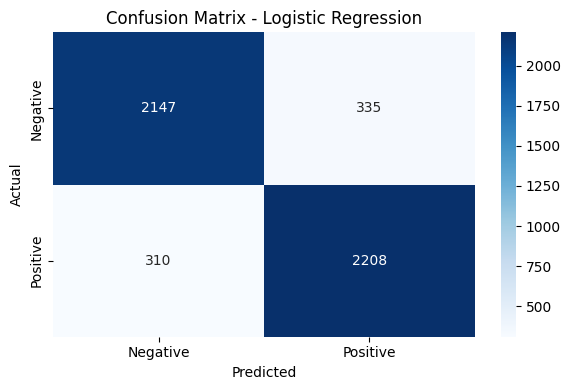

In [12]:
# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.savefig("confusion_matrix_logistic.png")
plt.show()

In [13]:
# Save model
joblib.dump(model, 'logistic_model_imdb.pkl')
print("✅ Model saved as 'logistic_model_imdb.pkl'")

✅ Model saved as 'logistic_model_imdb.pkl'
